# Import data and necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\raj4a\OneDrive\Desktop\Data for projects\Input_Data.csv")

# Understanding the data

In [3]:
data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Target
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


## After carefull observation and scrutiny of the data and also as the information / meta data is not provided the following conclusions are made.
*This data contains various customer related features.*
*The target variable indicates, whether customer churn or not.*
*The problem statement would be to construct a model to predict Customer Churn.*

## The different variables provided in the data are percieved as mentioned below.

*CustomerID: A unique identifier for each customer. This is typically used to distinguish between different customers and is not used for model training*.

*Age: The age of the customer. This is a numerical feature that can help understand the demographics of your customer base.*

*Gender: The gender of the customer. This is a categorical feature and can be converted into numerical values using techniques like one-hot encoding.*

*Tenure: The length of time (in months or years) that the customer has been with the company. This numerical feature can indicate customer loyalty.*

*Usage Frequency: How often the customer uses the service. This numerical feature can help understand customer engagement.*

*Support Calls: The number of support calls made by the customer. This numerical feature can indicate the level of customer satisfaction or issues faced by the customer.*

*Payment Delay: The number of times the customer has delayed payments. This numerical feature can indicate the customer’s payment behavior.*

*Subscription Type: The type of subscription the customer has. This is a categorical feature and can be converted into numerical values using techniques like one-hot encoding.*

*Contract Length: The length of the customer’s contract. This is a categorical feature and can indicate the customer’s commitment level.*

*Total Spend: The total amount of money spent by the customer. This numerical feature can indicate the customer’s value to the company.*

*Last Interaction: The time since the last interaction with the customer. This numerical feature can indicate the recency of customer engagement.*

*Target: The target variable for your binary classification model. This is the outcome you are trying to predict, such as whether a customer will churn (leave the service) or not.*

# Size of the data set

In [4]:
data.shape

(440833, 12)

# Data cleansing and Preperation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Target             440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


## Finding Missing Values

In [6]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Target               1
dtype: int64

## Removing missing values

In [7]:
data = data.dropna(how = 'all')

In [8]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Target               0
dtype: int64

**There are no missing values left.**

**However there is a necessity for changing the data types of certain variables to avoid anomolies.**

In [9]:
data['CustomerID']=data['CustomerID'].astype('object')
data['Age']=data['Age'].astype('int64')
data['Tenure']=data['Tenure'].astype('int64')
data['Usage Frequency']=data['Usage Frequency'].astype('int64')
data['Support Calls']=data['Support Calls'].astype('int64')
data['Payment Delay']=data['Payment Delay'].astype('int64')
data['Last Interaction']=data['Last Interaction'].astype('int64')
data['Target']=data['Target'].astype('str')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  object 
 1   Age                440832 non-null  int64  
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  int64  
 4   Usage Frequency    440832 non-null  int64  
 5   Support Calls      440832 non-null  int64  
 6   Payment Delay      440832 non-null  int64  
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  int64  
 11  Target             440832 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 43.7+ MB


In [11]:
data.shape

(440832, 12)

## Finding any duplicates in the dataset

In [12]:
duplicates = data[data.duplicated(subset=['CustomerID'])]
print(duplicates)

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Target]
Index: []


## Setting CustomerId column as index, as this column is not necessary in predictive model

In [13]:
data.set_index('CustomerID', inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 2.0 to 449999.0
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  int64  
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  int64  
 3   Usage Frequency    440832 non-null  int64  
 4   Support Calls      440832 non-null  int64  
 5   Payment Delay      440832 non-null  int64  
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  int64  
 10  Target             440832 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 40.4+ MB


In [15]:
data.head(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Target
CustomerID,,,,,,,,,,,
2.0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1.0
3.0,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1.0
4.0,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1.0
5.0,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1.0
6.0,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1.0
8.0,51,Male,33,25,9,26,Premium,Annual,129.0,8,1.0
9.0,58,Female,49,12,3,16,Standard,Quarterly,821.0,24,1.0
10.0,55,Female,37,8,4,15,Premium,Annual,445.0,30,1.0
11.0,39,Male,12,5,7,4,Standard,Quarterly,969.0,13,1.0


In [16]:
data.shape

(440832, 11)

# Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Identify categorical and numerical columns separately.

In [18]:
numerical_columns = data.select_dtypes(include = ['int64', 'float64']).columns
print(numerical_columns)

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')


In [19]:
categorical_columns = data.select_dtypes(include = ['object']).columns
print(categorical_columns)

Index(['Gender', 'Subscription Type', 'Contract Length', 'Target'], dtype='object')


**This approach ensures a robust classification of features into numerical and categorical, facilitating a comprehensive understanding of their nature and aiding subsequent analytical steps.**

## Univariate Analysis

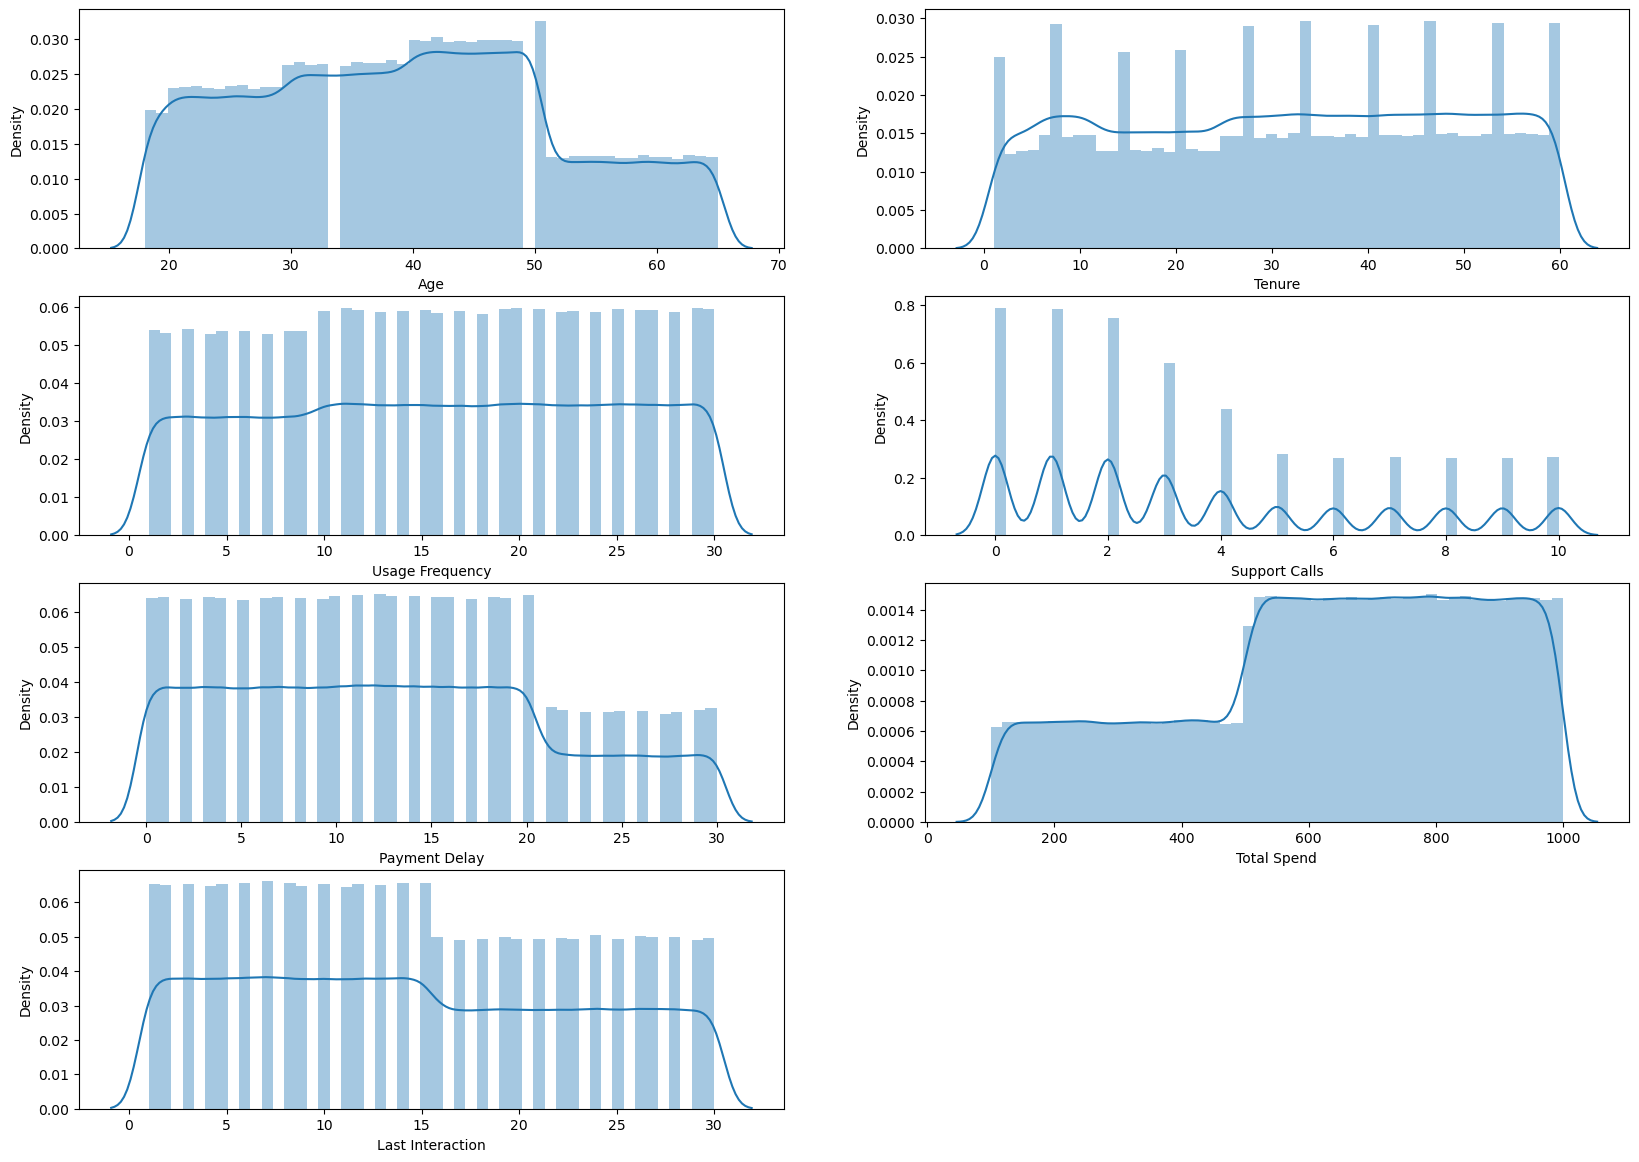

In [20]:
plt.figure(figsize = [20, 18])
for n, col in enumerate(numerical_columns):
    plt.subplot(5, 2, n+1)
    sns.distplot(data[col])


*The histogram presents the distribution data and its patterns.*
*The majority of the customer segment lies 20 to 50 and customers above 50 age are very few.*
*The length of periods were evenly distributed except for few.*
*The frequency of support recieved is high on minimum side.*
*frequency of payment delays is high on first 70 % and little low on remaining 30%.*


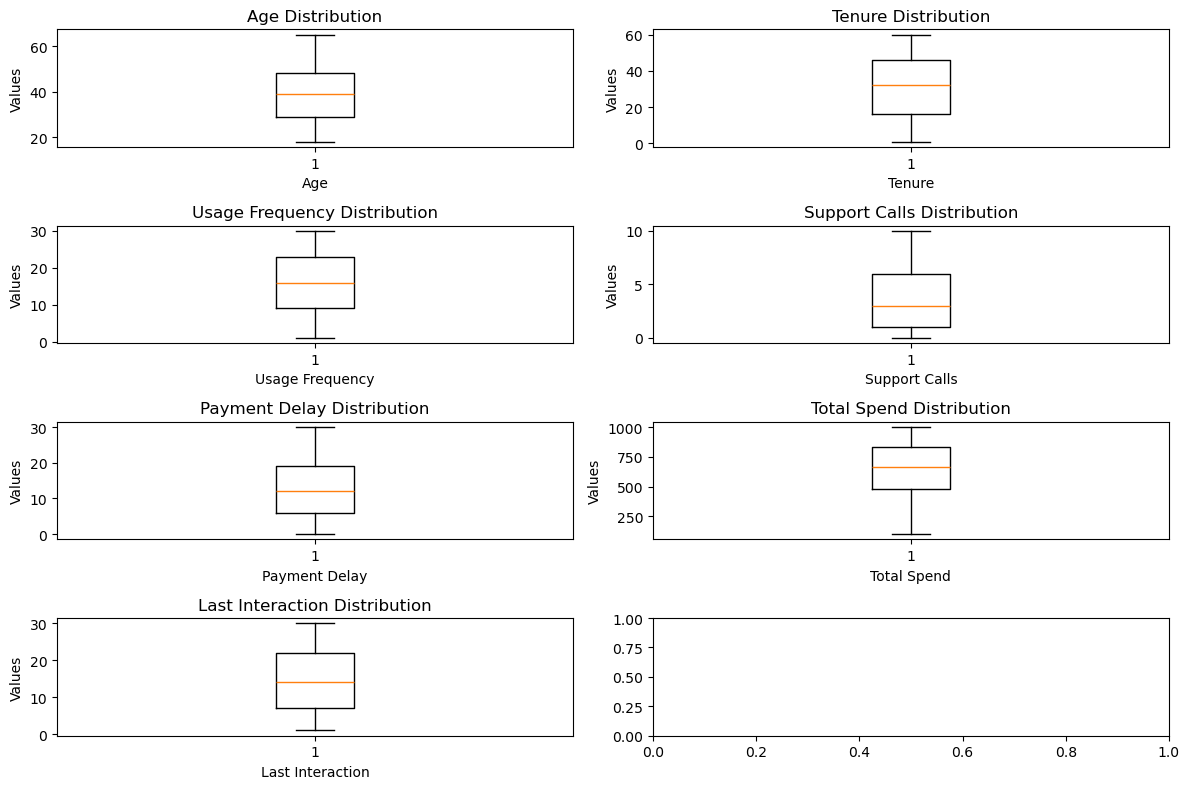

In [21]:
fig, axs = plt.subplots(4,2, figsize=(12,8))
axs = axs.flatten()
for n, col in enumerate(numerical_columns):
    axs[n].boxplot(data[col])
    axs[n].set_title(f'{col} Distribution')
    axs[n].set_xlabel(col)
    axs[n].set_ylabel('Values')
plt.tight_layout()

**The boxplot presents the distribution of the numerical columns and any outliers. The data doesn't contain any outliers. Therefore there is no necessity for outlier treatment.**

In [22]:
def percent_plot(var):
    values = (data[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

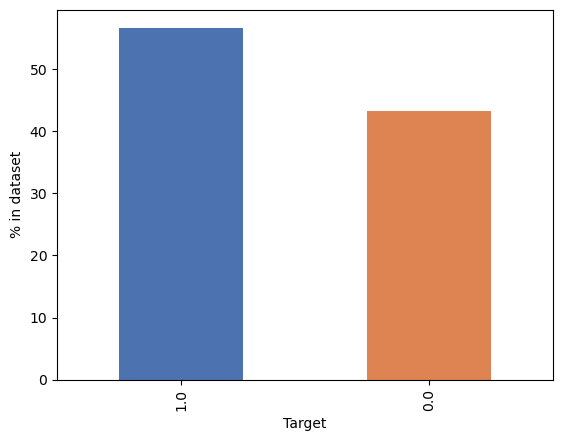

In [23]:
percent_plot('Target')

In [24]:
l1 = data.loc[data['Target']== "1.0"].count()[0]
print(f"Pecentage of Left: {l1/len(data['Target'])}")
print(data.Target.value_counts())

Pecentage of Left: 0.5671071972996515
Target
1.0    249999
0.0    190833
Name: count, dtype: int64


**The percentage of Customer Churned is 56%**

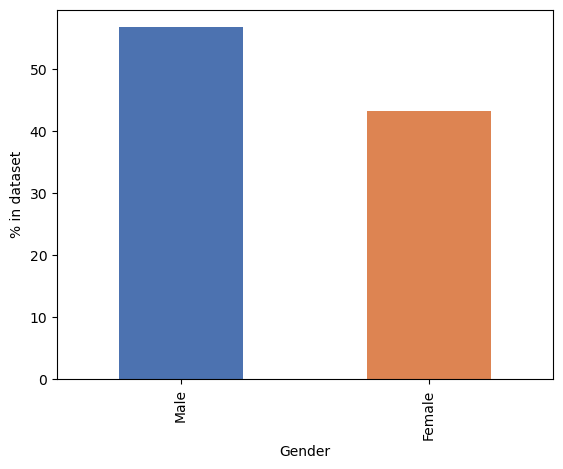

In [25]:
percent_plot('Gender')

**The percentage of Male customers is around 57 % and Female customers is 43 %**

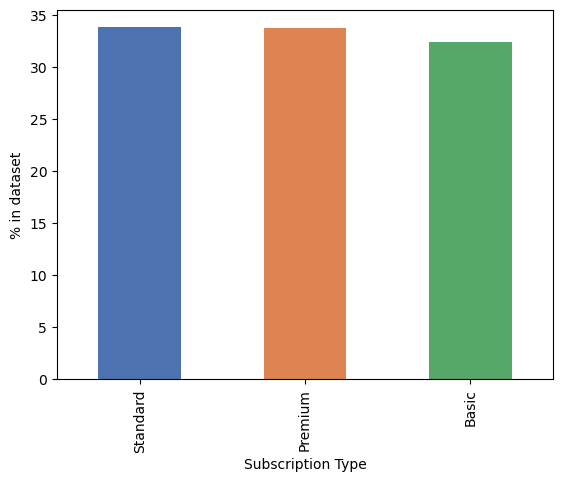

In [26]:
percent_plot('Subscription Type')

**The Subscription types are almost equally distributed among the customers**

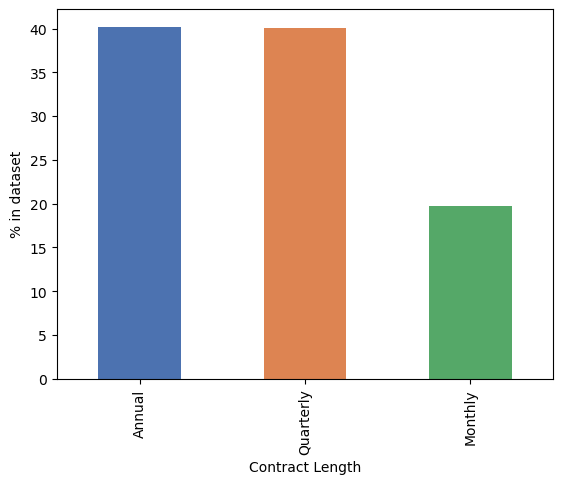

In [27]:
percent_plot('Contract Length')

**The categories describing the Contract Length with the customers have equal number of customers**

Text(0, 0.5, 'Frequency')

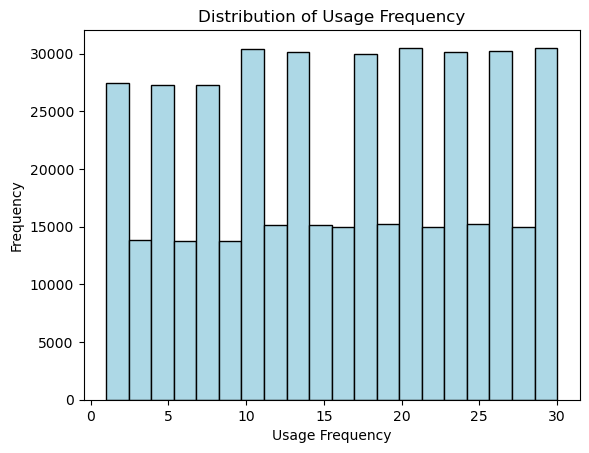

In [28]:
plt.hist(data['Usage Frequency'], bins = 20, color = 'lightblue', edgecolor = 'black')
plt.title('Distribution of Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Frequency')

*The Usage Frequency distribution is clear indicator of customers fall into unevenly distributed frequency.*

Text(0, 0.5, 'Frequency')

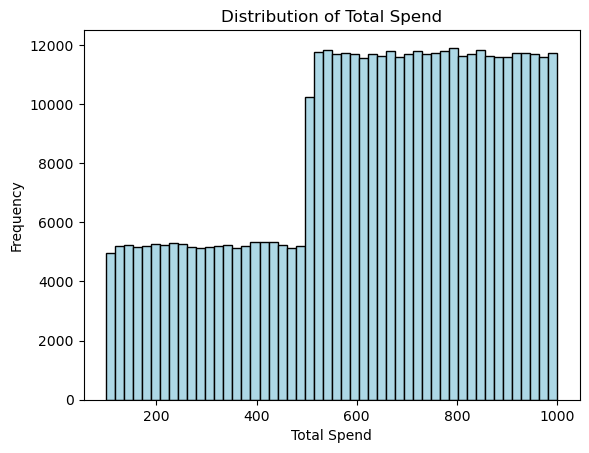

In [29]:
plt.hist(data['Total Spend'], bins = 50, color = 'lightblue', edgecolor = 'black')
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')

**More than 50% of the customers spend high**

Text(0, 0.5, 'Frequency')

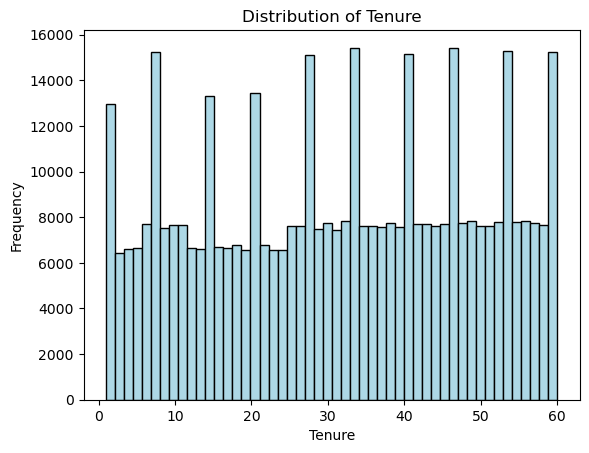

In [30]:
plt.hist(data['Tenure'], bins = 50, color = 'lightblue', edgecolor = 'black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

**The number of months or the tenure the customer is with the company lies from 1 month to 60 months.**

# Bivariate Analysis

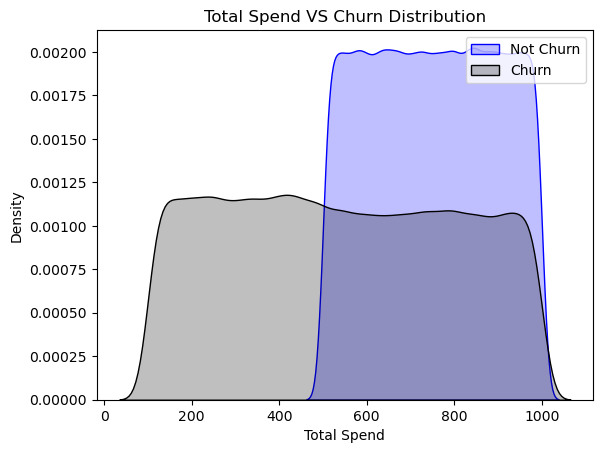

In [31]:
ax = sns.kdeplot(data["Total Spend"][(data["Target"] == "0.0") ],
                color="blue", shade = True);
ax = sns.kdeplot(data["Total Spend"][(data["Target"] == "1.0") ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Spend');
ax.set_title('Total Spend VS Churn Distribution');

**The Spend Analysis with Churn rate indicates the customers who spend more money are less likely to churn.**

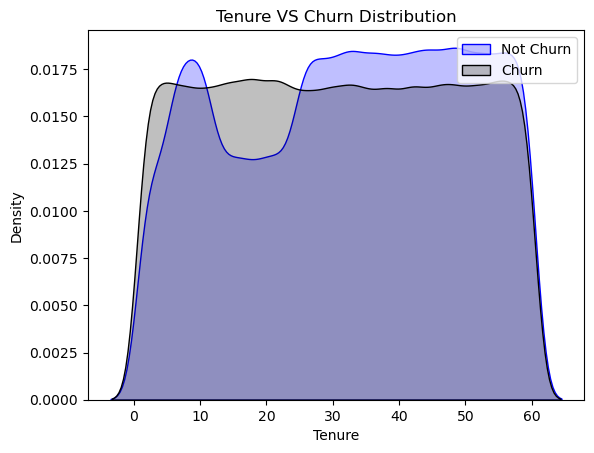

In [32]:
ax = sns.kdeplot(data.Tenure[(data["Target"] == '0.0') ],
                color="blue", shade = True);
ax = sns.kdeplot(data.Tenure[(data["Target"] == '1.0') ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Tenure VS Churn Distribution');

**The plot indicates that the churn has not much effected by the tenure**

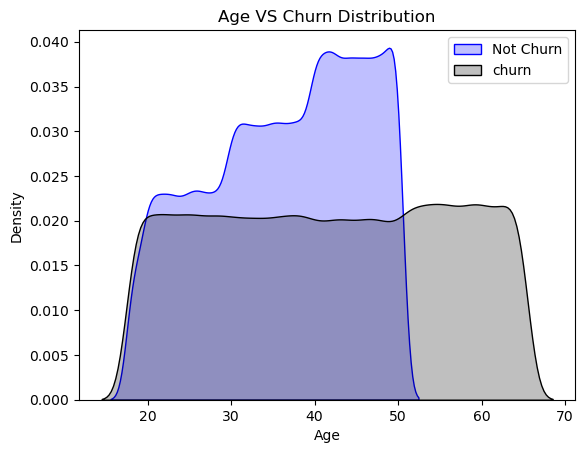

In [33]:
ax = sns.kdeplot(data.Age[(data["Target"] == "0.0") ],
                color="blue", shade = True);
ax = sns.kdeplot(data.Age[(data["Target"] == "1.0") ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Age VS Churn Distribution');

**The age group customers between 30 to 50 tend not to churn where as senior group do.**

## Check for skewness of data

In [34]:
data[numerical_columns].skew()

Age                 0.162016
Tenure             -0.061402
Usage Frequency    -0.043473
Support Calls       0.666809
Payment Delay       0.267407
Total Spend        -0.457174
Last Interaction    0.176774
dtype: float64

**The distribution is less / moderately skewed**

<Figure size 640x480 with 0 Axes>

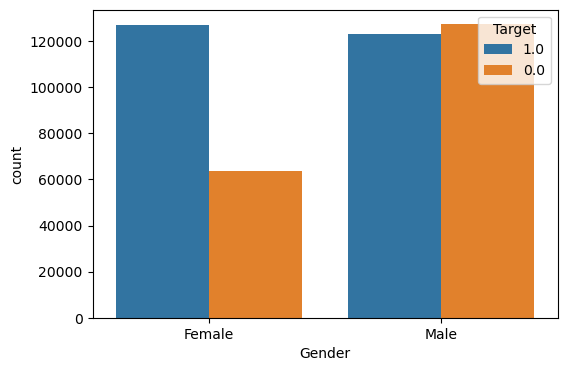

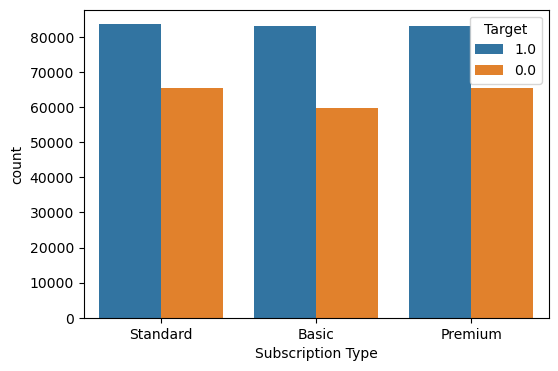

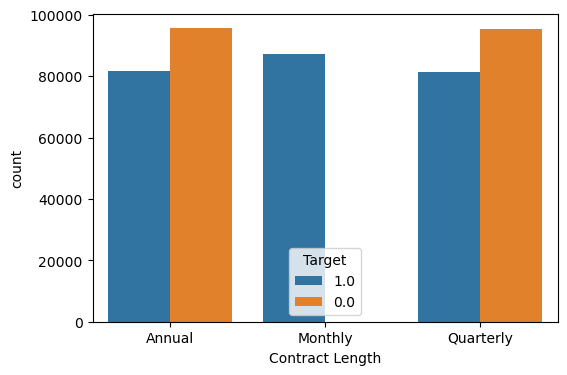

In [35]:
for i, feature in enumerate(categorical_columns):
    if feature != 'Target':
        plt.figure(i)
        plt.figure(figsize=(6,4))
        sns.countplot(data=data, x=feature, hue='Target')
plt.show()

**The Gender distribution with respect do churn rate clearly indicate Male ratio to female is equal**.
**The Subscription doesn't have major effect**
**The customers choosing monthly tend to churn out quickly**

# Multivariate Analysis

In [36]:
from sklearn.preprocessing import LabelEncoder

**Converting categorical variables to binary columns**

In [37]:
encoder = LabelEncoder()
for feature in categorical_columns:
    data[feature] = encoder.fit_transform(data[feature])

In [38]:
data.head(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Target
CustomerID,,,,,,,,,,,
2.0,30,0,39,14,5,18,2,0,932.0,17,1
3.0,65,0,49,1,10,8,0,1,557.0,6,1
4.0,55,0,14,4,6,18,0,2,185.0,3,1
5.0,58,1,38,21,7,7,2,1,396.0,29,1
6.0,23,1,32,20,5,8,0,1,617.0,20,1
8.0,51,1,33,25,9,26,1,0,129.0,8,1
9.0,58,0,49,12,3,16,2,2,821.0,24,1
10.0,55,0,37,8,4,15,1,0,445.0,30,1
11.0,39,1,12,5,7,4,2,2,969.0,13,1


In [39]:
data.shape

(440832, 11)

## Correlation HeatMap

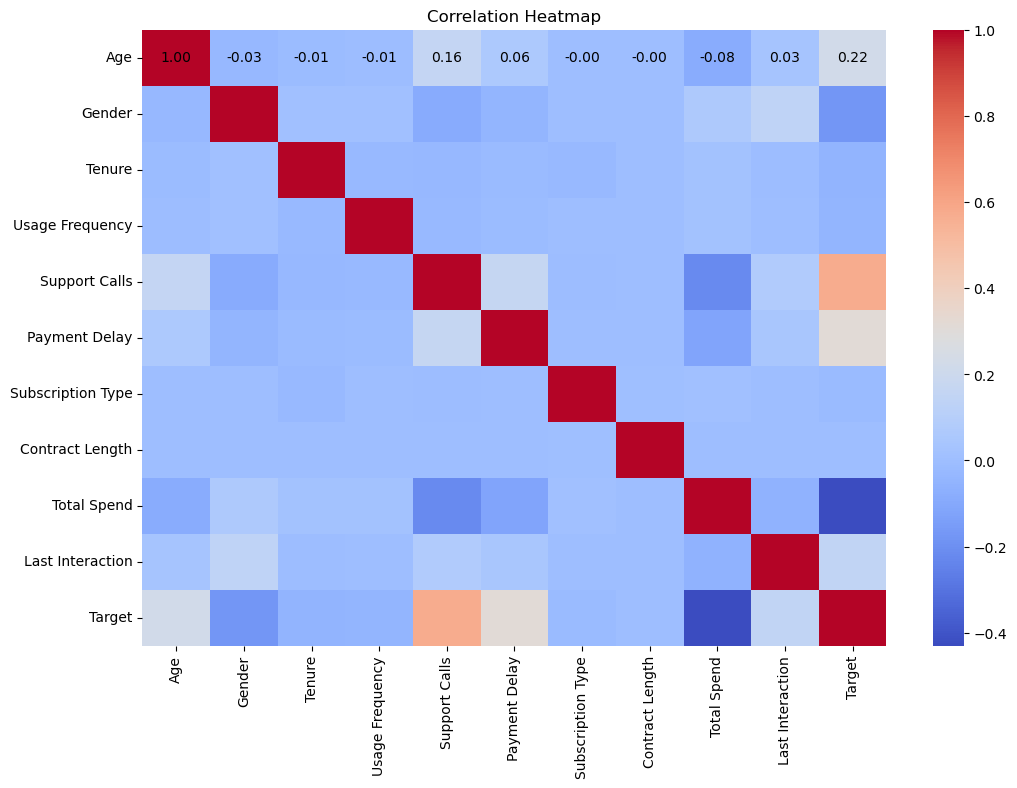

In [40]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws = {"size":10, "color":"black"})
plt.title('Correlation Heatmap')
plt.show()

## There is significant correlation among the variables on positive side as well as negative but with in range.

# Data Modelling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
X = data.drop("Target",axis=1)
y = data['Target']
X.shape

(440832, 10)

In [43]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
CustomerID,,,,,,,,,,
2.0,30,0,39,14,5,18,2,0,932.0,17
3.0,65,0,49,1,10,8,0,1,557.0,6
4.0,55,0,14,4,6,18,0,2,185.0,3
5.0,58,1,38,21,7,7,2,1,396.0,29
6.0,23,1,32,20,5,8,0,1,617.0,20


In [44]:
y.shape

(440832,)

In [45]:
X.describe()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,0.567681,31.256336,15.807494,3.604437,12.965722,1.013842,0.998485,631.616223,14.480868
std,12.442369,0.495399,17.255727,8.586242,3.070218,8.258063,0.813968,0.895773,240.803001,8.596208
min,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000
25%,29.000000,0.000000,16.000000,9.000000,1.000000,6.000000,0.000000,0.000000,480.000000,7.000000
50%,39.000000,1.000000,32.000000,16.000000,3.000000,12.000000,1.000000,1.000000,661.000000,14.000000
75%,48.000000,1.000000,46.000000,23.000000,6.000000,19.000000,2.000000,2.000000,830.000000,22.000000
max,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,2.000000,1000.000000,30.000000


In [46]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
CustomerID,,,,,,,,,,
2.0,30,0,39,14,5,18,2,0,932.0,17
3.0,65,0,49,1,10,8,0,1,557.0,6
4.0,55,0,14,4,6,18,0,2,185.0,3
5.0,58,1,38,21,7,7,2,1,396.0,29
6.0,23,1,32,20,5,8,0,1,617.0,20


**Splitting data to Train and Test for data modelling**

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Scaling Features

In [48]:
scaler = StandardScaler()
x_train[['Age','Tenure','Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend','Last Interaction']] = scaler.fit_transform(x_train[['Age','Tenure','Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend','Last Interaction']])
x_test[['Age','Tenure','Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend','Last Interaction']] = scaler.transform(x_test[['Age','Tenure','Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend','Last Interaction']]) 

In [49]:
x_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
CustomerID,,,,,,,,,,
328860.0,-1.234718,1,1.550094,1.419341,-1.173301,-1.086163,0,0,0.139639,1.689759
179930.0,-1.234718,1,-0.305269,-0.443767,-0.847672,1.578104,0,2,0.508215,-0.287785
279562.0,-1.716941,1,0.274532,-0.909544,-1.173301,-0.722854,1,2,0.918640,-0.636763
68280.0,-0.270271,0,-0.769110,-0.793100,-0.522042,1.214794,1,1,0.524821,-1.334720
71967.0,1.417510,0,-0.247289,1.186452,1.431737,0.245970,0,1,0.234211,-0.520437


## Importing necessary libraries to support classification 

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

## Defining functions to train the model on different classifications and to evaluate their performance

In [51]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    
    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)
    print(f'Confusion matrix :\n {confusion_matrix(prediction, y_test)}')
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

    

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='s', annot_kws={"size": 8})

    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## Logistic Regression

Accuracy is : 0.8504542515907312
Confusion matrix :
 [[32318  7440]
 [ 5745 42664]]
Cross Validation Score :  92.84%
ROC_AUC Score :  85.03%
--------------------------------------------------------------------------------


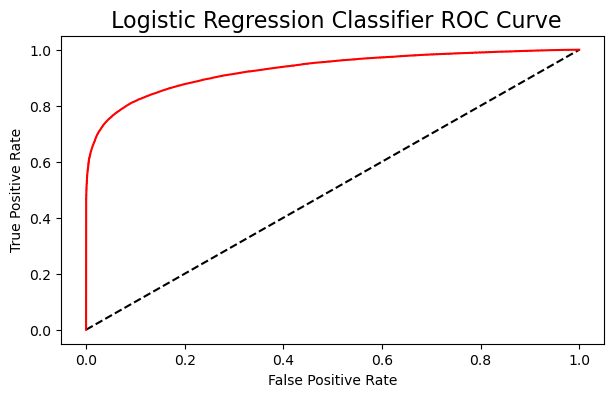

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     38063
           1       0.88      0.85      0.87     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



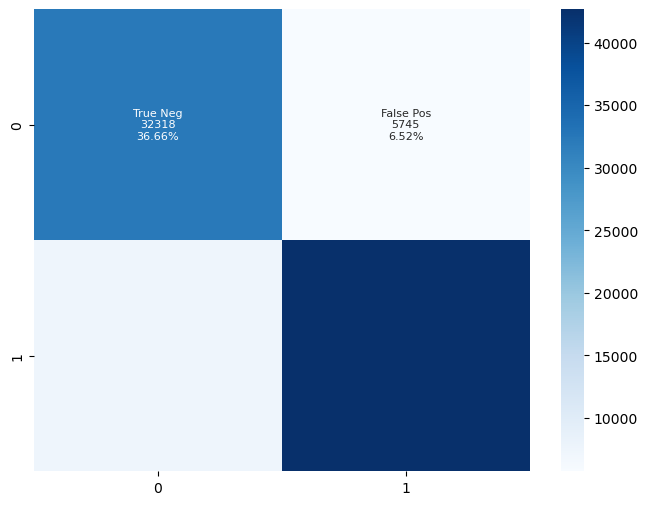

In [52]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,x_test,y_test)

## Decision Tree Classifier

Accuracy is : 0.9535880771717309
Confusion matrix :
 [[38061  4090]
 [    2 46014]]
Cross Validation Score :  96.03%
ROC_AUC Score :  95.92%
--------------------------------------------------------------------------------


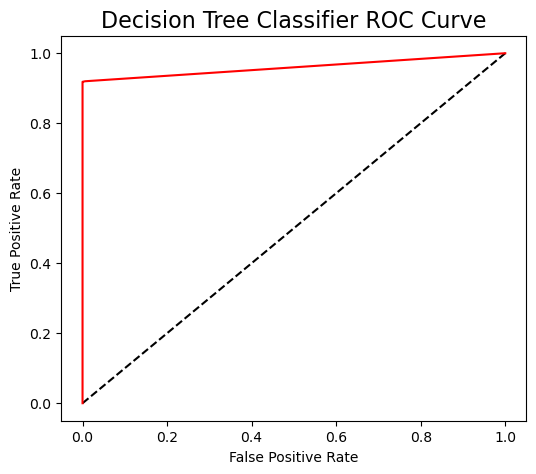

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     38063
           1       1.00      0.92      0.96     50104

    accuracy                           0.95     88167
   macro avg       0.95      0.96      0.95     88167
weighted avg       0.96      0.95      0.95     88167



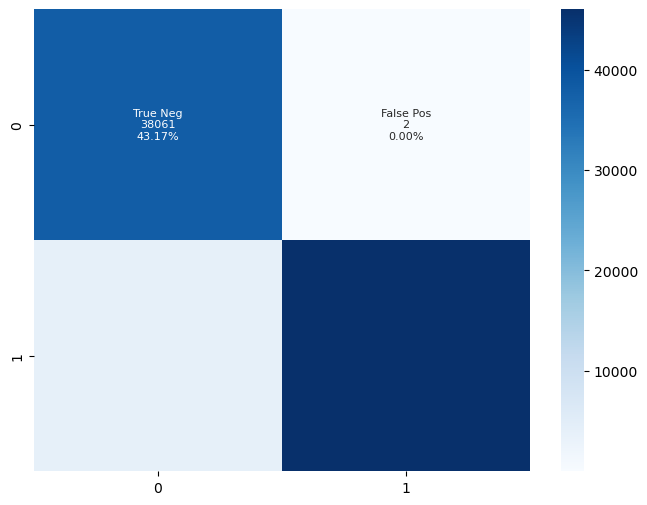

In [53]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,x_test,y_test)

## Random Forest Classifier

Accuracy is : 0.9527033924257375
Confusion matrix :
 [[37824  3931]
 [  239 46173]]
Cross Validation Score :  99.58%
ROC_AUC Score :  95.76%
--------------------------------------------------------------------------------


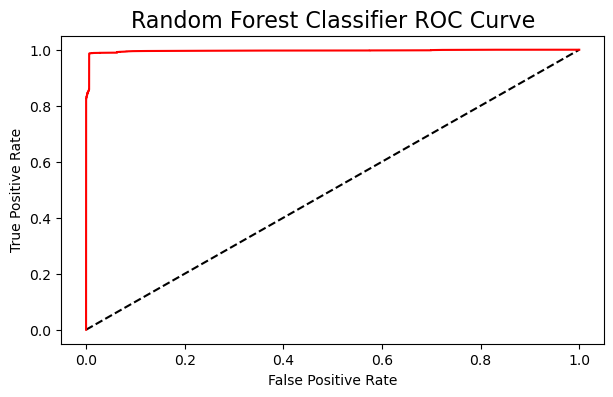

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     38063
           1       0.99      0.92      0.96     50104

    accuracy                           0.95     88167
   macro avg       0.95      0.96      0.95     88167
weighted avg       0.96      0.95      0.95     88167



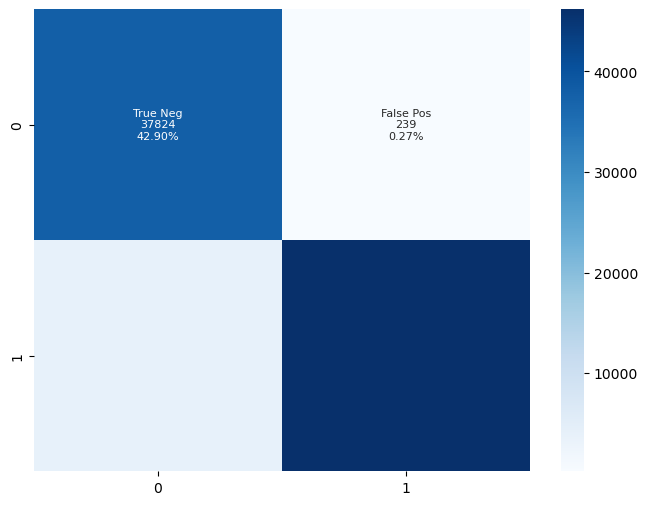

In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,x_test,y_test)

## Xgboost Classifier

Accuracy is : 0.9926729955652341
Confusion matrix :
 [[38062   645]
 [    1 49459]]
Cross Validation Score :  99.96%
ROC_AUC Score :  99.36%
--------------------------------------------------------------------------------


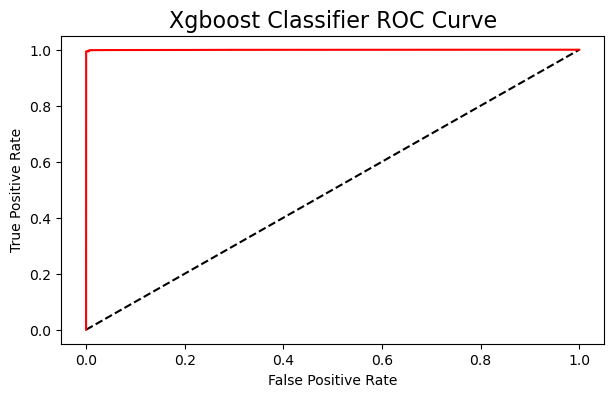

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     38063
           1       1.00      0.99      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



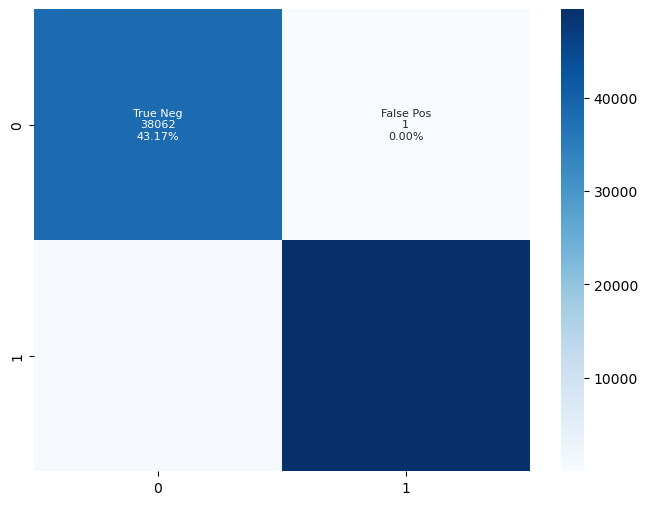

In [55]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Xgboost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xgboost Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_xgb,x_test,y_test)

## Presenting the results of all the four classifiers in a table

In [56]:
data_classifier = {
    'ML Algorithm': ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [99.26, 95.27, 95.35, 85.04],
    'Cross Validation Score': [99.96, 99.58, 96.03, 92.84],
    'ROC AUC Score': [99.36, 95.76, 95.92, 85.03],
    'F1 Score (Churn)': [99, 95, 95, 85]
}

results_df = pd.DataFrame(data_classifier)
results_df

,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,XGBClassifier,99.26,99.96,99.36,99
1,RandomForestClassifier,95.27,99.58,95.76,95
2,DecisionTreeClassifier,95.35,96.03,95.92,95
3,LogisticRegressionClassifier,85.04,92.84,85.03,85


**Hyperparameter tuning will boost or elevate F1 Score (Churn) and Cross Validation Score in future iterations.**

## Rewriting the Xgbooster Classifier Model to save it.

In [57]:
xgb_classifier = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
xgb_classifier.fit(x_train, y_train)
pred = xgb_classifier.predict(x_test)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.9926729955652341
Confusion matrix :
 [[38062   645]
 [    1 49459]]
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     38707
           1       0.99      1.00      0.99     49460

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [58]:
import pickle

In [59]:
filename = 'model.sav'
pickle.dump(xgb_classifier, open(filename, 'wb'))

In [60]:
load_model = pickle.load(open(filename, 'rb')) 
result = load_model.score(x_test, y_test) 
print(result)

0.9926729955652341


## Conclusion

**Real-World Business Insights: This dataset provides a valuable glimpse into real-world business challenges, offering an opportunity to leverage Data Science techniques for effective solutions.**

**EDA for System Evaluation: Insights derived from Exploratory Data Analysis (EDA) prove invaluable for gauging the efficacy of existing systems. They serve as a foundation for strategic planning, enabling the formulation of measures for problem mitigation and continuous improvement.**
    
**This comprehensive analysis not only sheds light on current business intricacies but also lays the groundwork for continuous refinement and advancement in addressing customer churn challenges.**

In [61]:
test_set = pd.read_csv(r"C:\Users\raj4a\OneDrive\Desktop\Study Material\Test_Data - Copy.csv")

In [62]:
test_set.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20
2,3,47,Male,27,10,2,29,Premium,Annual,757,21
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,5,53,Female,58,24,9,2,Standard,Annual,533,18


In [63]:
test_set.shape

(64374, 11)

In [64]:
test_set.set_index('CustomerID', inplace = True)
test_set.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
CustomerID,,,,,,,,,,
1,22,Female,25,14,4,27,Basic,Monthly,598,9
2,41,Female,28,28,7,13,Standard,Monthly,584,20
3,47,Male,27,10,2,29,Premium,Annual,757,21
4,35,Male,9,12,5,17,Premium,Quarterly,232,18
5,53,Female,58,24,9,2,Standard,Annual,533,18


In [65]:
for feature in test_set.columns:
    if test_set[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Gender
Subscription Type
Contract Length


In [66]:
encoder = LabelEncoder()
for feature in test_set.columns:
    if test_set[feature].dtypes == 'O':
        test_set[feature] = encoder.fit_transform(test_set[feature])

In [67]:
test_set.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
CustomerID,,,,,,,,,,
1,22,0,25,14,4,27,0,1,598,9
2,41,0,28,28,7,13,2,1,584,20
3,47,1,27,10,2,29,1,0,757,21
4,35,1,9,12,5,17,1,2,232,18
5,53,0,58,24,9,2,2,0,533,18


In [68]:
predictions = load_model.predict(test_set)
print(predictions)

[1 1 1 ... 1 1 1]


In [69]:
test_set = test_set.assign(C = predictions)

In [70]:
test_set.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,C
CustomerID,,,,,,,,,,,
1,22,0,25,14,4,27,0,1,598,9,1
2,41,0,28,28,7,13,2,1,584,20,1
3,47,1,27,10,2,29,1,0,757,21,1
4,35,1,9,12,5,17,1,2,232,18,1
5,53,0,58,24,9,2,2,0,533,18,1
